# Tarefa Individual 3 I2A2

---
## Descrição das Variáveis do Dataset
### BASE CLIMÁTICA
* data (datetime): data do registro.
* chuvas_previstas_mm (float): precipitação prevista em mm (0–200).
* chuvas_reais_mm (float): precipitação medida em mm.
* temperatura_media_C (float): temperatura média diária em °C (20–35).
* variacao_climatica (string): indicador de variação climática (“sim”, “não”)
* indice_umidade_solo (float): umidade do solo (%) (10–90).

### BASE SOCIOECONÔMICA
* data (datetime): data do registro.
* volume_producao_tons (float): volume produzido em toneladas (0.5–20).
* incidencia_doencas (int/float): número de casos de doenças hídricas (Poisson λ=2)
* acesso_agua_potavel (string): acesso à água potável (“sim”, “não”).
* indicador_seguranca_alimentar (float): índice de segurança alimentar (0–100).

---
## OBJETIVO PEDAGÓGICO DA ATIVIDADE
* #### Desenvolver a capacidade de transformar dados brutos em informações confiáveis, aplicando técnicas de limpeza, padronização e tratamento de dados em um contexto real da Amazônia.
* #### Fortalecer o pensamento analítico e crítico, por meio da definição clara de problemas, formulação de hipóteses e exploração de relações entre variáveis socioambientais e climáticas.
* #### Aprimorar habilidades práticas em Análise Exploratória de Dados (EDA), utilizando ferramentas digitais para gerar visualizações, descobrir padrões e criar narrativas baseadas em dados, com foco em soluções para desafios socioambientais.

---
## CRITÉRIOS DE AVALIAÇÃO
* Clareza na definição do problema.
* Coerência na análise dos dados.
* Qualidade dos insights gerados.
* Organização e apresentação da solução.



---
# Importação de Bibliotecas

In [263]:
import pandas as pd

In [264]:
df_clima = pd.read_csv('base_climatica.csv')
df_socio = pd.read_csv('base_socioeconomica.csv')

In [265]:
df_clima.head()

,data,chuvas_previstas_mm,chuvas_reais_mm,temperatura_media_C,variacao_climatica,indice_umidade_solo
0,2025-01-01,109.8,110.0,34.7,sim,45.9
1,2025-01-02,143.0,178.7,27.2,nao,34.4
2,2025-01-03,120.6,123.1,27.5,sim,77.1
3,2025-01-04,109.0,117.0,29.6,nao,29.0
4,2025-03-28,104.6,91.7,31.4,nao,45.4


In [266]:
df_socio.head()

,data,volume_producao_tons,incidencia_doencas,acesso_agua_potavel,indicador_seguranca_alimentar
0,2025-01-01,8.63,0.0,não,45.7
1,2025-01-02,1000.00,200.0,não,13.8
2,2025-01-03,0.50,0.0,não,1.1
3,2025-01-04,6.40,2.0,Sim,75.8
4,2025-01-05,3.36,2.0,não,32.0


---
## Remover duplicatas

In [267]:
# Remover duplicatas da base climática
df_clima = df_clima.drop_duplicates()

# Remover duplicatas da base socioeconômica
df_socio = df_socio.drop_duplicates()

---
## Padronizar categorias como "sim", "não" e "não"

In [268]:
# Padronizando 'variacao_climatica' na base climática
df_clima['variacao_climatica'] = (
    df_clima['variacao_climatica']
    .str.strip()
    .str.lower()
    .replace({'sim': 'Sim', 'nao': 'Não', 'não': 'Não'})
)

# Padronizando 'acesso_agua_potavel' na base socioeconômica
df_socio['acesso_agua_potavel'] = (
    df_socio['acesso_agua_potavel']
    .str.strip()
    .str.lower()
    .replace({'sim': 'Sim', 'nao': 'Não', 'não': 'Não'})
)

---
## Tratar dados ausentes 

In [269]:
# Verificar dados ausentes antes
print("Dados ausentes antes (Climática):\n", df_clima.isna().sum())
print("\nDados ausentes antes (Socioeconômica):\n", df_socio.isna().sum())

Dados ausentes antes (Climática):
 data                   0
chuvas_previstas_mm    0
chuvas_reais_mm        3
temperatura_media_C    2
variacao_climatica     0
indice_umidade_solo    4
dtype: int64

Dados ausentes antes (Socioeconômica):
 data                             0
volume_producao_tons             5
incidencia_doencas               5
acesso_agua_potavel              0
indicador_seguranca_alimentar    0
dtype: int64


In [ ]:
# Como a quantidade é pequena e tem muitas linhas, vale mais a pena remover as linhas

df_clima = df_clima.dropna(subset=['chuvas_reais_mm', 
                                   'chuvas_previstas_mm', 
                                   'temperatura_media_C', 
                                   'variacao_climatica',
                                   'indice_umidade_solo'])
df_socio = df_socio.dropna(subset=['volume_producao_tons', 'incidencia_doencas'])

In [271]:
print("\nDados ausentes após (Climática):\n", df_clima.isna().sum())
print("\nDados ausentes após (Socioeconômica):\n", df_socio.isna().sum())


Dados ausentes após (Climática):
 data                   0
chuvas_previstas_mm    0
chuvas_reais_mm        0
temperatura_media_C    0
variacao_climatica     0
indice_umidade_solo    0
dtype: int64

Dados ausentes após (Socioeconômica):
 data                             0
volume_producao_tons             0
incidencia_doencas               0
acesso_agua_potavel              0
indicador_seguranca_alimentar    0
dtype: int64


---
## Converter formatos de datas para um padrão único

In [272]:
# Converter a coluna 'data' para datetime no formato YYYY-MM-DD
df_clima['data'] = pd.to_datetime(df_clima['data'], format='%Y-%m-%d')
df_socio['data'] = pd.to_datetime(df_socio['data'], format='%Y-%m-%d')

In [273]:
df_clima

,data,chuvas_previstas_mm,chuvas_reais_mm,temperatura_media_C,variacao_climatica,indice_umidade_solo
0,2025-01-01,109.8,110.0,34.7,Sim,45.9
1,2025-01-02,143.0,178.7,27.2,Não,34.4
2,2025-01-03,120.6,123.1,27.5,Sim,77.1
3,2025-01-04,109.0,117.0,29.6,Não,29.0
4,2025-03-28,104.6,91.7,31.4,Não,45.4
...,...,...,...,...,...,...
114,2025-04-25,162.8,181.0,26.0,Sim,22.8
115,2025-04-26,79.3,85.6,33.9,Sim,62.9
116,2025-04-27,176.2,191.9,21.5,Não,45.2
117,2025-04-28,116.3,107.0,34.2,Sim,16.1


In [274]:
df_socio

,data,volume_producao_tons,incidencia_doencas,acesso_agua_potavel,indicador_seguranca_alimentar
0,2025-01-01,8.63,0.0,Não,45.7
1,2025-01-02,1000.00,200.0,Não,13.8
2,2025-01-03,0.50,0.0,Não,1.1
3,2025-01-04,6.40,2.0,Sim,75.8
4,2025-01-05,3.36,2.0,Não,32.0
...,...,...,...,...,...
112,2025-04-23,18.69,0.0,Não,17.7
113,2025-04-24,14.09,1.0,Sim,57.2
114,2025-04-25,1.79,2.0,Não,4.5
118,2025-04-29,14.37,2.0,Sim,74.0


---
## Verificação de Outliers

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

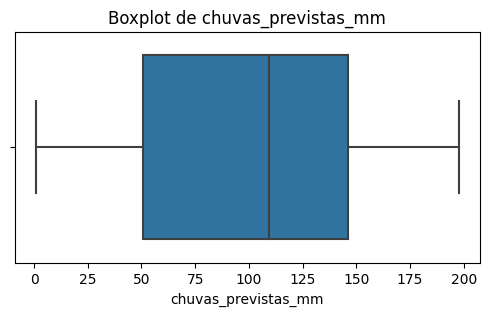

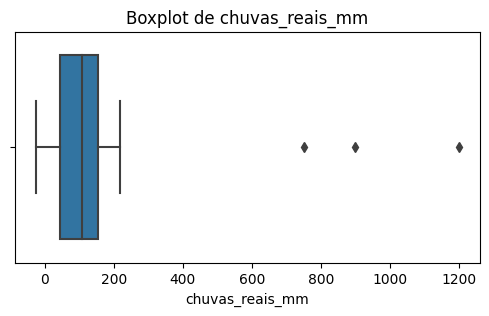

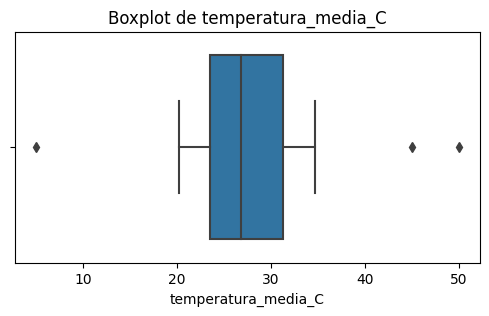

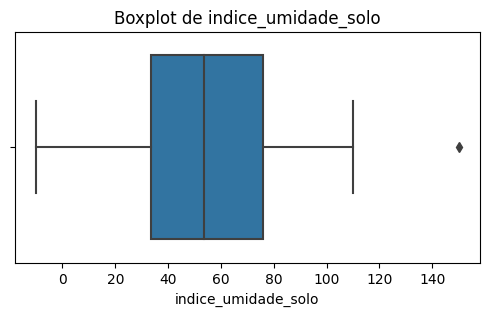

In [276]:
cols_clima = ['chuvas_previstas_mm', 'chuvas_reais_mm', 'temperatura_media_C', 'indice_umidade_solo']

for col in cols_clima:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_clima[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [277]:
# Detectar outliers usando IQR
def detectar_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = data[(data < limite_inferior) | (data > limite_superior)]
    return outliers

for col in cols_clima:
    outliers = detectar_outliers_iqr(df_clima[col])
    print(f'Outliers em {col}:')
    print(outliers)

# Detectar outliers usando Z-score
for col in cols_clima:
    z_scores = np.abs(stats.zscore(df_clima[col].dropna()))
    outliers = df_clima[col][(z_scores > 3)]
    print(f'Outliers com z-score > 3 em {col}:')
    print(outliers)

Outliers em chuvas_previstas_mm:
Series([], Name: chuvas_previstas_mm, dtype: float64)
Outliers em chuvas_reais_mm:
31     900.0
45    1200.0
73     750.0
Name: chuvas_reais_mm, dtype: float64
Outliers em temperatura_media_C:
31     5.0
45    50.0
73    45.0
Name: temperatura_media_C, dtype: float64
Outliers em indice_umidade_solo:
73    150.0
Name: indice_umidade_solo, dtype: float64
Outliers com z-score > 3 em chuvas_previstas_mm:
Series([], Name: chuvas_previstas_mm, dtype: float64)
Outliers com z-score > 3 em chuvas_reais_mm:
31     900.0
45    1200.0
73     750.0
Name: chuvas_reais_mm, dtype: float64
Outliers com z-score > 3 em temperatura_media_C:
31     5.0
45    50.0
73    45.0
Name: temperatura_media_C, dtype: float64
Outliers com z-score > 3 em indice_umidade_solo:
73    150.0
Name: indice_umidade_solo, dtype: float64


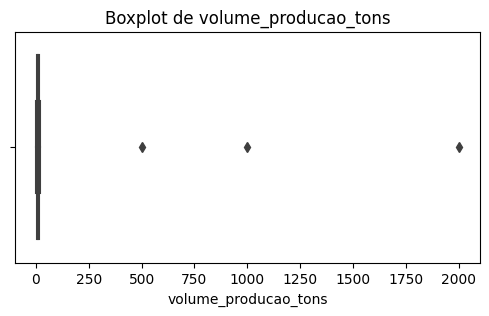

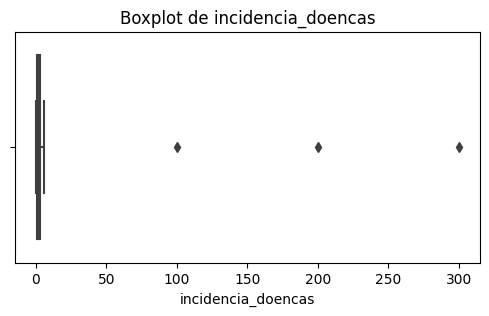

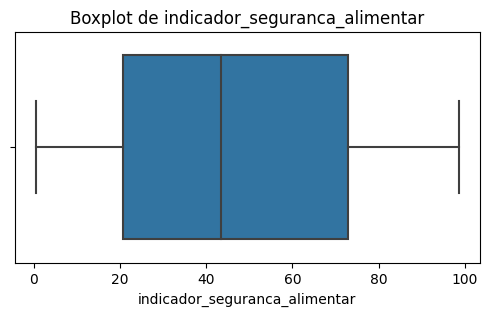

In [278]:
cols_socio = ['volume_producao_tons', 'incidencia_doencas', 'indicador_seguranca_alimentar']

for col in cols_socio:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_socio[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [279]:
for col in cols_socio:
    outliers = detectar_outliers_iqr(df_socio[col])
    print(f'Outliers em {col}:')
    print(outliers)

for col in cols_socio:
    z_scores = np.abs(stats.zscore(df_socio[col].dropna()))
    outliers = df_socio[col][(z_scores > 3)]
    print(f'Outliers com z-score > 3 em {col}:')
    print(outliers)

Outliers em volume_producao_tons:
1     1000.0
63     500.0
96    2000.0
Name: volume_producao_tons, dtype: float64
Outliers em incidencia_doencas:
1     200.0
63    100.0
96    300.0
Name: incidencia_doencas, dtype: float64
Outliers em indicador_seguranca_alimentar:
Series([], Name: indicador_seguranca_alimentar, dtype: float64)
Outliers com z-score > 3 em volume_producao_tons:
1     1000.0
96    2000.0
Name: volume_producao_tons, dtype: float64
Outliers com z-score > 3 em incidencia_doencas:
1     200.0
96    300.0
Name: incidencia_doencas, dtype: float64
Outliers com z-score > 3 em indicador_seguranca_alimentar:
Series([], Name: indicador_seguranca_alimentar, dtype: float64)


---
## Análise Exploratória (EDA)

In [280]:
# Estatítica descritiva

# Para a base climática
print(df_clima.describe())

# Para a base socioeconômica
print(df_socio.describe())

                      data  chuvas_previstas_mm  chuvas_reais_mm  \
count                  102           102.000000       102.000000   
mean   2025-03-02 00:00:00           101.257843       125.934314   
min    2025-01-01 00:00:00             0.900000       -25.700000   
25%    2025-01-29 06:00:00            50.575000        44.500000   
50%    2025-03-04 00:00:00           109.400000       106.600000   
75%    2025-04-01 12:00:00           146.075000       154.350000   
max    2025-04-29 00:00:00           197.700000      1200.000000   
std                    NaN            57.969064       160.671714   

       temperatura_media_C  indice_umidade_solo  
count           102.000000           102.000000  
mean             27.292157            53.447059  
min               5.000000           -10.000000  
25%              23.525000            33.550000  
50%              26.850000            53.650000  
75%              31.275000            76.075000  
max              50.000000           

---
## Histogramas

d:\Ferramentas\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


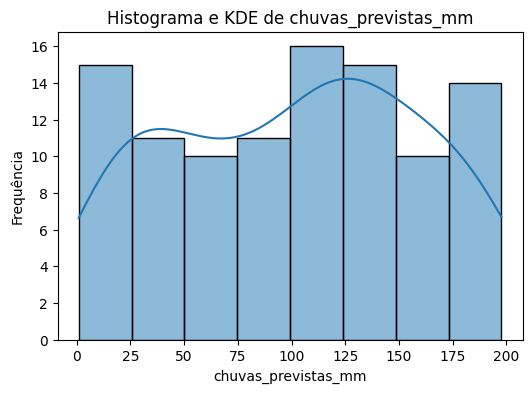

d:\Ferramentas\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


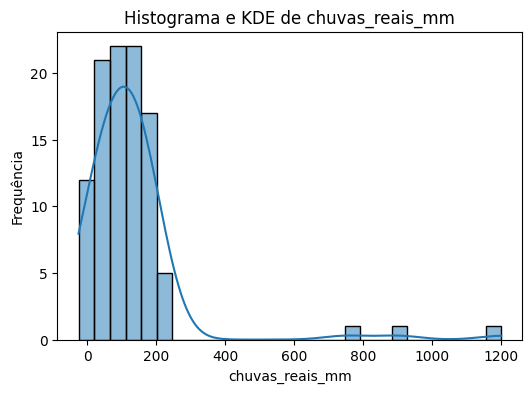

d:\Ferramentas\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


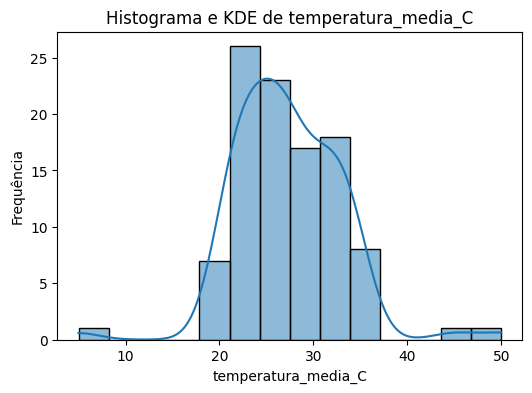

d:\Ferramentas\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


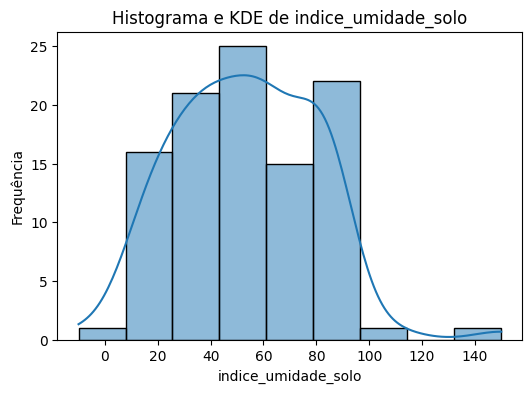

d:\Ferramentas\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


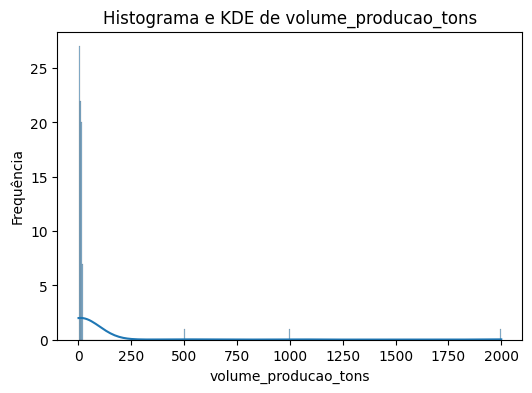

d:\Ferramentas\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


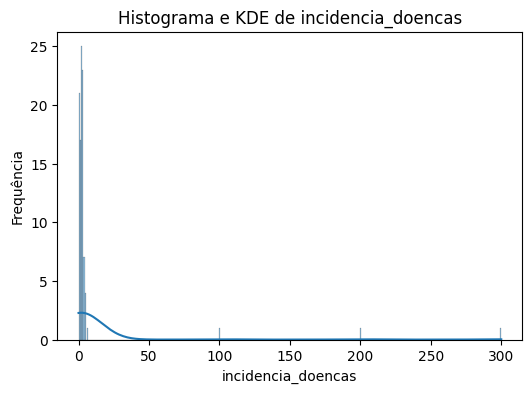

d:\Ferramentas\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


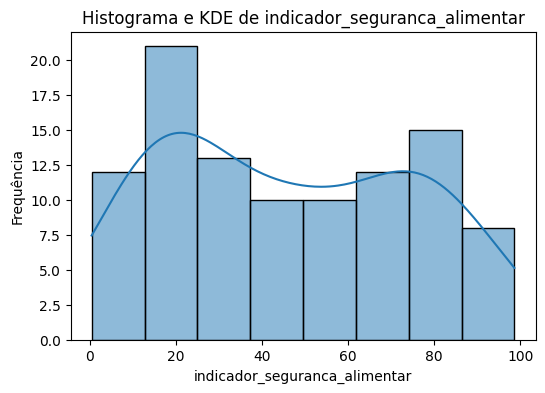

In [281]:
# Variáveis da base climática
cols_clima = ['chuvas_previstas_mm', 'chuvas_reais_mm', 'temperatura_media_C', 'indice_umidade_solo']

for col in cols_clima:
    plt.figure(figsize=(6,4))
    sns.histplot(df_clima[col].dropna(), kde=True) 
    plt.title(f'Histograma e KDE de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

# Variáveis da base socioeconômica
cols_socio = ['volume_producao_tons', 'incidencia_doencas', 'indicador_seguranca_alimentar']

for col in cols_socio:
    plt.figure(figsize=(6,4))
    sns.histplot(df_socio[col].dropna(), kde=True)
    plt.title(f'Histograma e KDE de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()


---
## Boxplot

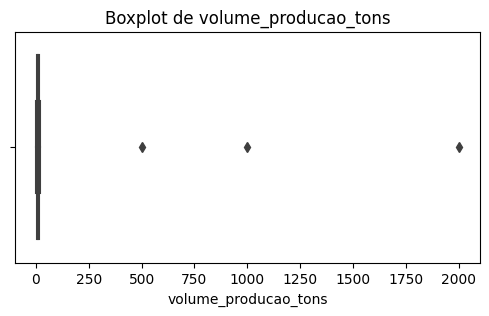

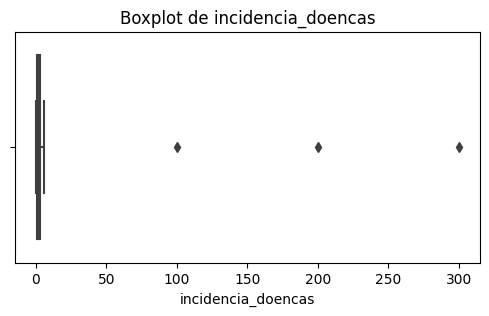

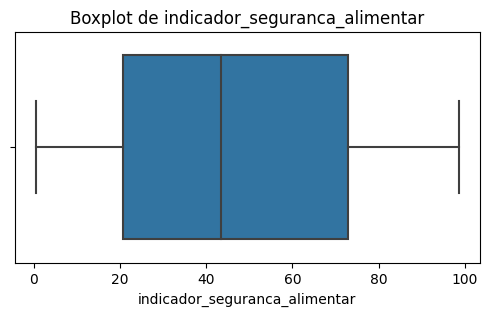

In [282]:
for col in cols_socio:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df_socio[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

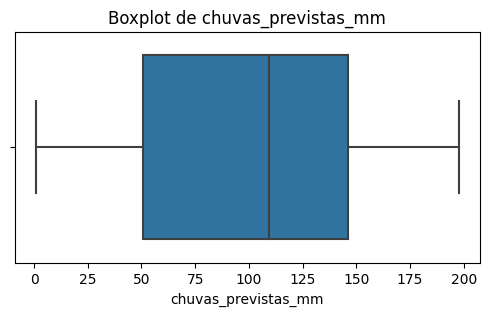

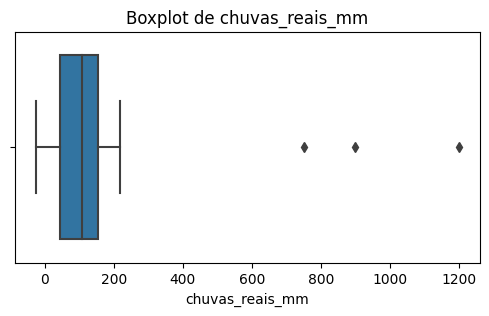

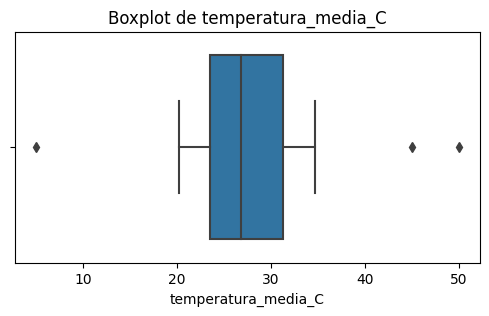

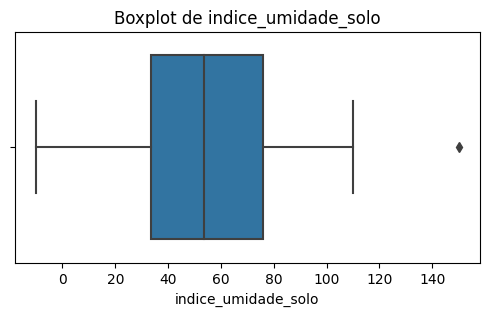

In [283]:
for col in cols_clima:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df_clima[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

---
## Substituir outliers pela mediana da variável

In [284]:
mediana_clima = df_clima[['indice_umidade_solo', 'chuvas_reais_mm', 'temperatura_media_C']].median()
mediana_socio = df_socio[['incidencia_doencas', 'volume_producao_tons']].median()

outliers = detectar_outliers_iqr(df_clima[['indice_umidade_solo', 'chuvas_reais_mm', 'temperatura_media_C']]).index
outliers = detectar_outliers_iqr(df_socio[['incidencia_doencas', 'volume_producao_tons']]).index

cols_clima = ['indice_umidade_solo', 'chuvas_reais_mm', 'temperatura_media_C']

for col in cols_clima:
    mediana = mediana_clima[col]
    outliers_idx = detectar_outliers_iqr(df_clima[col]).index
    df_clima.loc[outliers_idx, col] = mediana

cols_socio = ['incidencia_doencas', 'volume_producao_tons']

for col in cols_socio:
    mediana = mediana_socio[col]
    outliers_idx = detectar_outliers_iqr(df_socio[col]).index
    df_socio.loc[outliers_idx, col] = mediana

---
## Colunas com remoção de outliers

### Clima

d:\Ferramentas\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


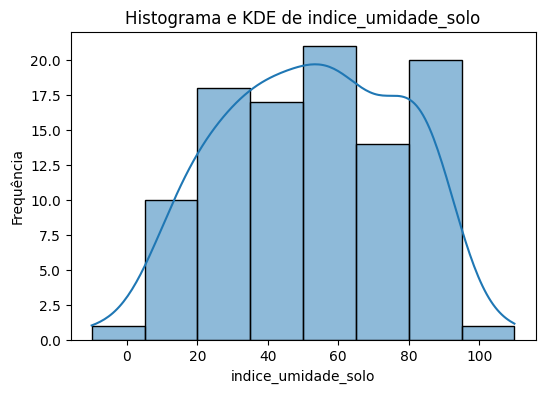

d:\Ferramentas\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


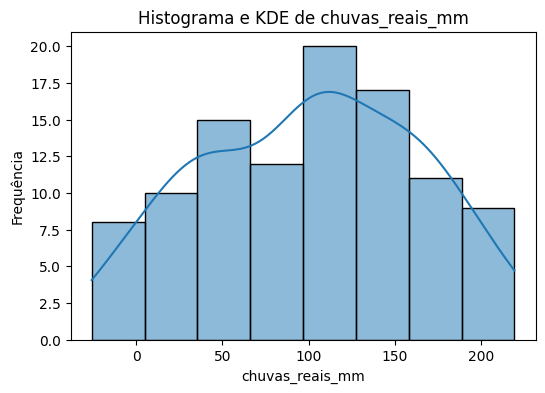

d:\Ferramentas\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


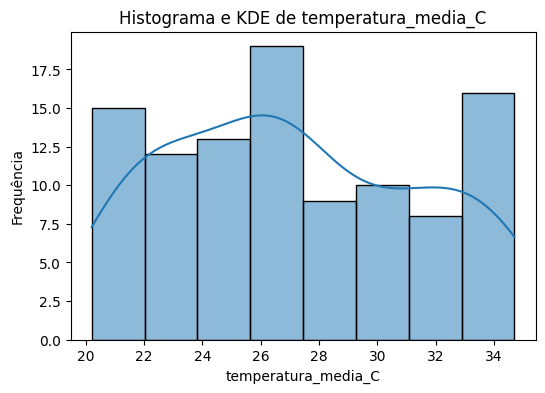

In [285]:
for col in cols_clima:
    plt.figure(figsize=(6,4))
    sns.histplot(df_clima[col].dropna(), kde=True)  # kde=True adiciona a curva de densidade
    plt.title(f'Histograma e KDE de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

### Socioeconomica

d:\Ferramentas\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


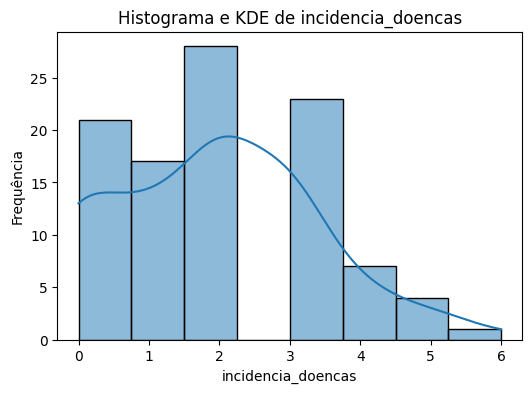

d:\Ferramentas\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


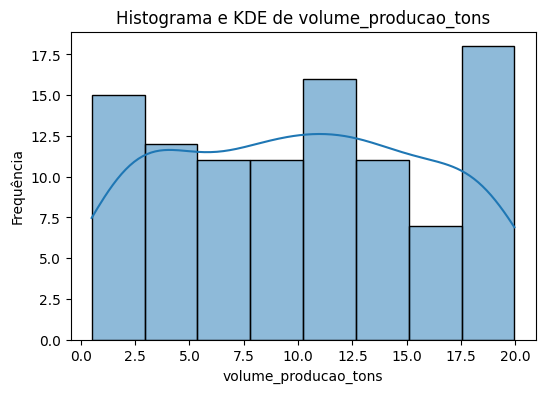

d:\Ferramentas\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


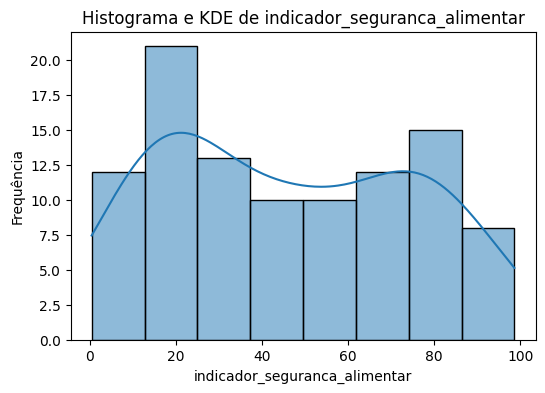

In [286]:
cols_socio = ['incidencia_doencas', 'volume_producao_tons', 'indicador_seguranca_alimentar']
for col in cols_socio:
    plt.figure(figsize=(6,4))
    sns.histplot(df_socio[col].dropna(), kde=True)
    plt.title(f'Histograma e KDE de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

---
## Entender a correlação entre chuvas, produtividade agrícola e incidência de doenças

In [287]:
# Juntar TODAS as colunas das duas bases usando a coluna 'data' como chave
df_merged = pd.merge(
    df_clima,
    df_socio,
    on='data',
    how='inner'
)

In [288]:
# Selecionar apenas as colunas de interesse
df_corr = df_merged[['chuvas_previstas_mm', 'chuvas_reais_mm', 'volume_producao_tons', 'incidencia_doencas']]

# Calcular correlação
correlation_matrix = df_corr.corr()

print(correlation_matrix)

                      chuvas_previstas_mm  chuvas_reais_mm  \
chuvas_previstas_mm              1.000000         0.946014   
chuvas_reais_mm                  0.946014         1.000000   
volume_producao_tons            -0.094694        -0.106839   
incidencia_doencas              -0.007469         0.002823   

                      volume_producao_tons  incidencia_doencas  
chuvas_previstas_mm              -0.094694           -0.007469  
chuvas_reais_mm                  -0.106839            0.002823  
volume_producao_tons              1.000000            0.012122  
incidencia_doencas                0.012122            1.000000  


## Correlação com heatmap

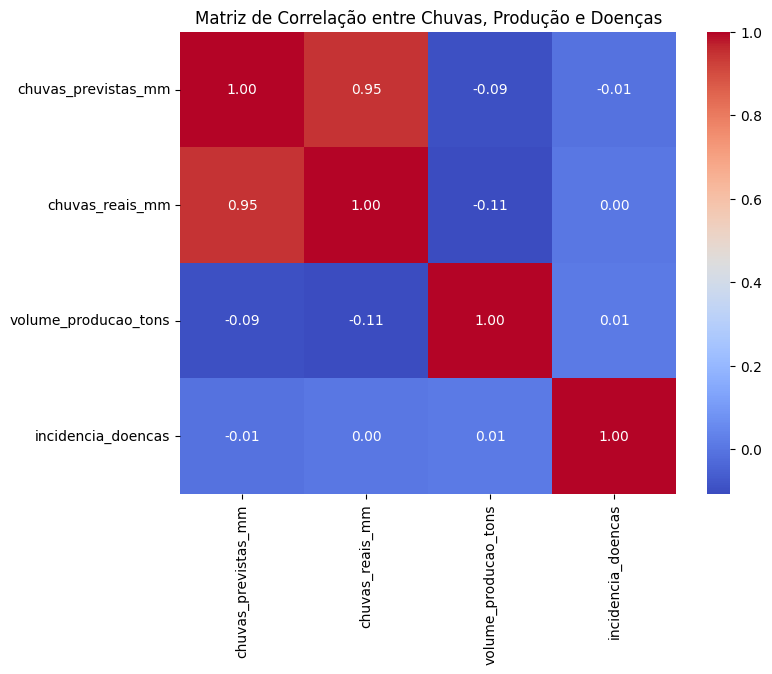

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação entre Chuvas, Produção e Doenças")
plt.show()

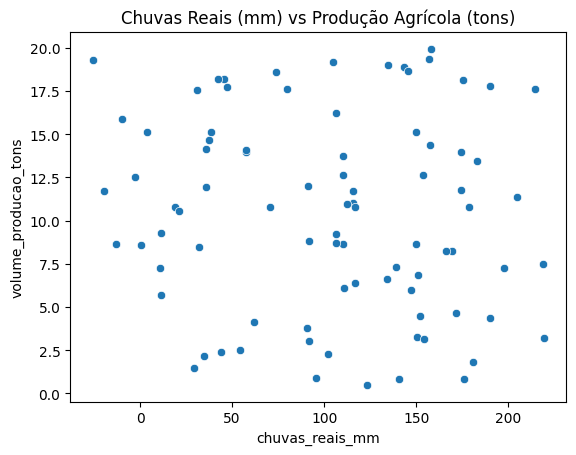

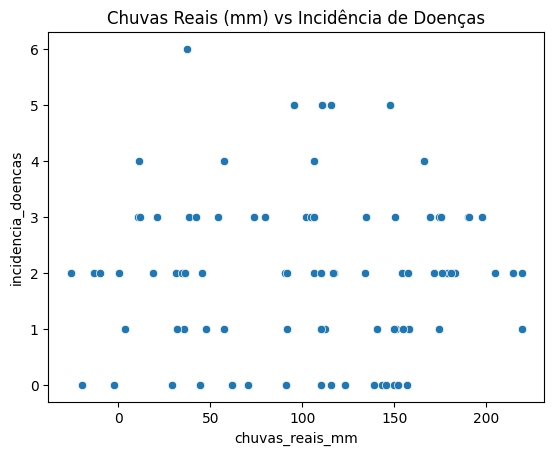

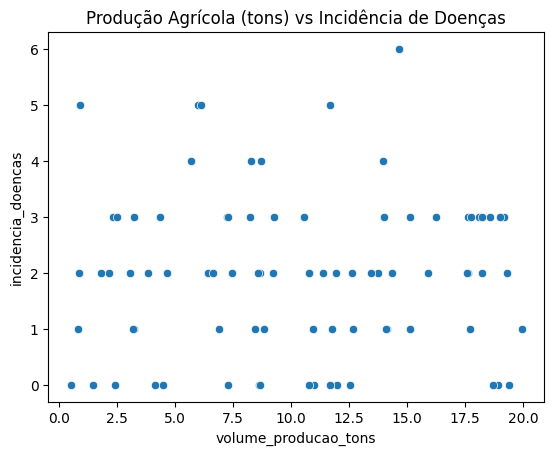

In [ ]:
# Chuvas x Produção
sns.scatterplot(x='chuvas_reais_mm', y='volume_producao_tons', data=df_merged)
plt.title("Chuvas Reais (mm) vs Produção Agrícola (tons)")
plt.show()

---
# Perguntas a serem respondidas

Q1: Existe relação entre chuvas reais e o volume de produção agrícola?

In [291]:
correlacao = df_merged['chuvas_reais_mm'].corr(df_merged['volume_producao_tons'])
print(f'Coeficiente de correlação de Pearson: {correlacao:.2f}')


Coeficiente de correlação de Pearson: -0.11


* A análise da correlação de Pearson entre chuvas reais e volume de produção agrícola resultou em -0,11, indicando ausência de relação linear significativa entre variáveis nos dados analisados. Isso sugere que, isoladamente, a quantidade de chuva não explica variações no volume de produção agrícola, sendo provável que outros fatores, como manejo agrícola, tipo de solo e condições climáticas complementares, exerçam maior influência sobre a produtividade.

---
Q2: Chuvas acima ou abaixo da previsão impactam a produção agrícola?

In [292]:
df_merged['chuva_diff'] = df_merged['chuvas_reais_mm'] - df_merged['chuvas_previstas_mm']

correlacao_q2 = df_merged['chuva_diff'].corr(df_merged['volume_producao_tons'])
print(f'Coeficiente de correlação de Pearson (Q2): {correlacao_q2:.2f}')


Coeficiente de correlação de Pearson (Q2): -0.06


* A análise da correlação de Pearson entre o desvio de chuvas (reais menos previstas) e o volume de produção agrícola resultou em -0,06, indicando ausência de relação linear significativa entre as variáveis. Isso sugere que, nos dados analisados, chuvas acima ou abaixo do previsto não impactaram de forma consistente a produção agrícola, apontando que outros fatores, como manejo, tipo de cultura e práticas agrícolas, podem ter maior influência sobre a produtividade do que variações em relação às previsões de chuva.

---
Q3: Comunidades sem acesso à água potável apresentam índices mais baixos de segurança alimentar?

<Axes: xlabel='acesso_agua_potavel', ylabel='indicador_seguranca_alimentar'>

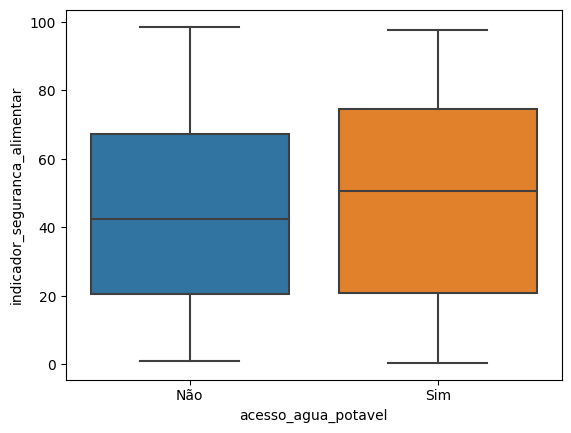

In [293]:
sns.boxplot(x='acesso_agua_potavel', y='indicador_seguranca_alimentar', data=df_socio)

* A análise do acesso à água potável e o índice de segurança alimentar indicou que as comunidades sem acesso à água potável (“não”) apresentaram índices de segurança alimentar consistentemente mais baixos em comparação às comunidades com acesso (“sim”). Esse resultado evidencia que a falta de acesso à água potável está associada a menor segurança alimentar, possivelmente devido a limitações na produção de alimentos, maior vulnerabilidade a doenças e restrições no preparo seguro de alimentos, afetando diretamente a qualidade de vida e a segurança nutricional das comunidades analisadas.

---
Q4: Existe relação entre acesso à água potável e a incidência de doenças hídricas?

<Axes: xlabel='acesso_agua_potavel', ylabel='incidencia_doencas'>

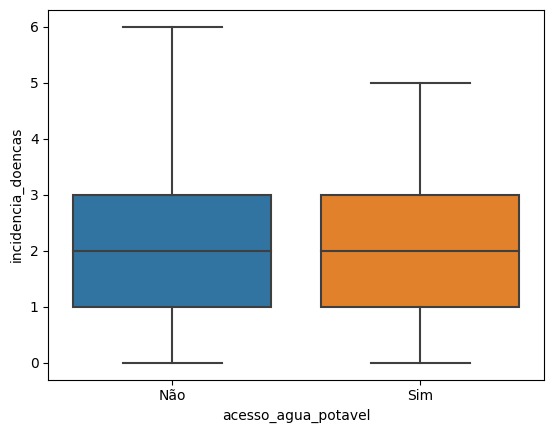

In [294]:
sns.boxplot(x='acesso_agua_potavel', y='incidencia_doencas', data=df_socio)


* Na análise, o boxplot indicou valores similares entre comunidades com e sem acesso a água potável. Isso sugere que, nos dados analisados, a presença ou ausência de acesso a água potável não apresentou associação clara com a incidência de doenças hídricas, indicando que outros fatores, como saneamento básico, praticas de higiene e condições ambientais, podem exercer maior influência sobre a ocorrência dessas doenças nas comunidades estudadas.

---
Q5: Quais fatores climáticos (chuva, temperatura, umidade, variação climática) mais impactam o índice de segurança alimentar?

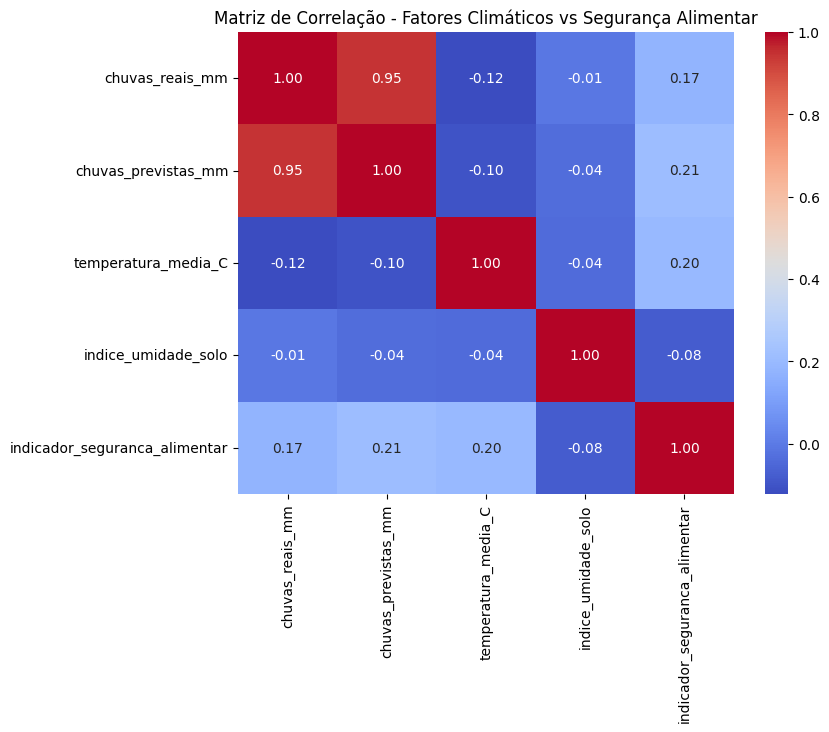

In [295]:
# Selecionar as variáveis de interesse
variaveis = [
    'chuvas_reais_mm',
    'chuvas_previstas_mm',
    'temperatura_media_C',
    'indice_umidade_solo',
    'indicador_seguranca_alimentar'
]

# Matriz de correlação
correlacao_q5 = df_merged[variaveis].corr()

# Visualizar como heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(correlacao_q5, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação - Fatores Climáticos vs Segurança Alimentar')
plt.show()
